In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df=pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [38]:
df.dtypes

Delivery Time       float64
Sorting Time          int64
Deliverd_predict    float64
dtype: object

In [39]:
df.isnull()

,Delivery Time,Sorting Time,Deliverd_predict
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [41]:
df.isnull().sum()

Delivery Time       0
Sorting Time        0
Deliverd_predict    0
dtype: int64

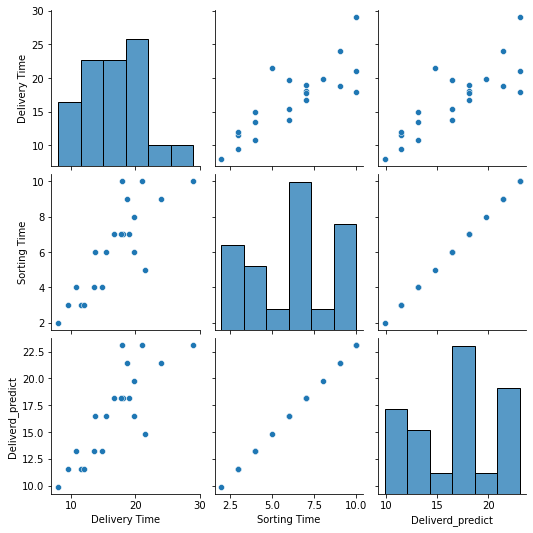

In [42]:
sns.pairplot(data = df)

<AxesSubplot:ylabel='Count'>

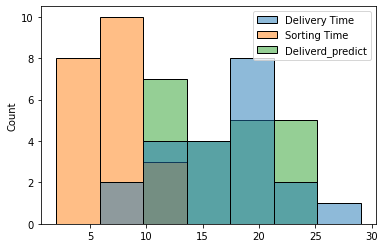

In [44]:
sns.histplot(data = df)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

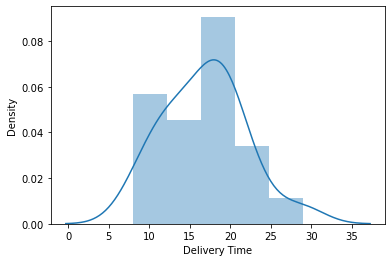

In [5]:
sns.distplot(df['Delivery Time'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

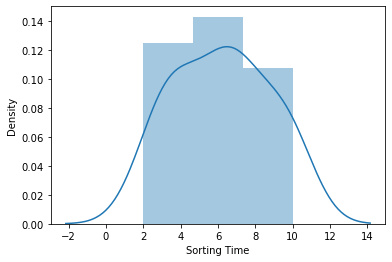

In [6]:
sns.distplot(df['Sorting Time'])

In [7]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [8]:
df['Sorting Time'].describe()


count    21.000000
mean      6.190476
std       2.542028
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Sorting Time, dtype: float64

In [9]:
df['Delivery Time'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery Time, dtype: float64

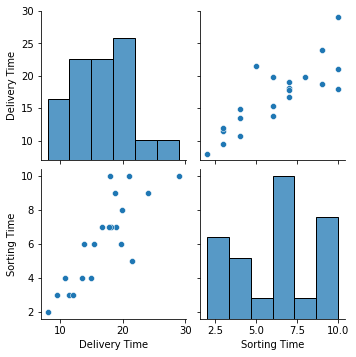

In [10]:
sns.pairplot(df)

In [11]:
model = smf.ols("df['Delivery Time']~df['Sorting Time']",data = df).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     df['Delivery Time']   R-squared:                       0.682
Model:                             OLS   Adj. R-squared:                  0.666
Method:                  Least Squares   F-statistic:                     40.80
Date:                 Thu, 01 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                         02:01:40   Log-Likelihood:                -51.357
No. Observations:                   21   AIC:                             106.7
Df Residuals:                       19   BIC:                             108.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5827      1.722      3.823      0.001       2.979      10.186
df['Sorting Time']     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
print(model.summary())
prediction = model.predict(df.iloc[:,1])

                             OLS Regression Results                            
Dep. Variable:     df['Delivery Time']   R-squared:                       0.682
Model:                             OLS   Adj. R-squared:                  0.666
Method:                  Least Squares   F-statistic:                     40.80
Date:                 Thu, 01 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                         02:01:40   Log-Likelihood:                -51.357
No. Observations:                   21   AIC:                             106.7
Df Residuals:                       19   BIC:                             108.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5

                             OLS Regression Results                            
Dep. Variable:     df['Delivery Time']   R-squared:                       0.682
Model:                             OLS   Adj. R-squared:                  0.666
Method:                  Least Squares   F-statistic:                     40.80
Date:                 Thu, 01 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                         02:01:40   Log-Likelihood:                -51.357
No. Observations:                   21   AIC:                             106.7
Df Residuals:                       19   BIC:                             108.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5

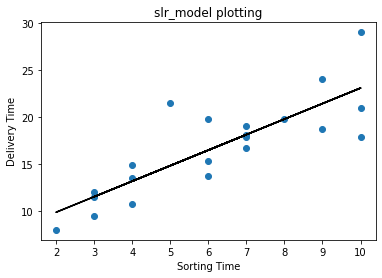

In [14]:
slr_model=smf.ols("df['Delivery Time']~df['Sorting Time']",data=df).fit()
print(slr_model.summary())
predict=slr_model.predict(df.iloc[:,1])
import matplotlib.pylab as plt
plt.scatter(x=df['Sorting Time'],y=df['Delivery Time'])
plt.plot(df['Sorting Time'],predict,color='black')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.title("slr_model plotting")
plt.show()

                             OLS Regression Results                            
Dep. Variable:     df['Delivery Time']   R-squared:                       0.695
Model:                             OLS   Adj. R-squared:                  0.679
Method:                  Least Squares   F-statistic:                     43.39
Date:                 Thu, 01 Dec 2022   Prob (F-statistic):           2.64e-06
Time:                         02:01:41   Log-Likelihood:                -50.912
No. Observations:                   21   AIC:                             105.8
Df Residuals:                       19   BIC:                             107.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept 

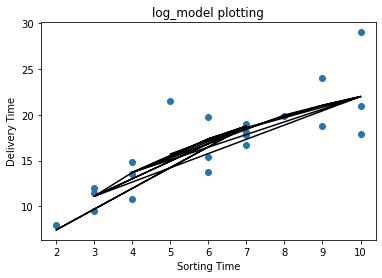

In [15]:
log_model=smf.ols("df['Delivery Time']~np.log(df['Sorting Time'])",data=df).fit()
print(log_model.summary())
log_predict=log_model.predict(pd.DataFrame(df['Sorting Time']))

import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(x=df['Sorting Time'],y=df['Delivery Time'])
plt.plot(df['Sorting Time'],log_predict,color='black')
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.title("log_model plotting")
plt.show()

                                 OLS Regression Results                                
Dep. Variable:     np.log(df['Delivery Time'])   R-squared:                       0.711
Model:                                     OLS   Adj. R-squared:                  0.696
Method:                          Least Squares   F-statistic:                     46.73
Date:                         Thu, 01 Dec 2022   Prob (F-statistic):           1.59e-06
Time:                                 02:01:41   Log-Likelihood:                 7.7920
No. Observations:                           21   AIC:                            -11.58
Df Residuals:                               19   BIC:                            -9.495
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

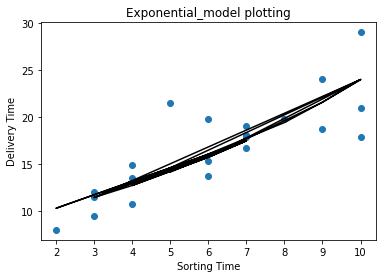

In [16]:
exp_model=smf.ols("np.log(df['Delivery Time'])~(df['Sorting Time'])",data=df).fit()
print(exp_model.summary())
predict_exp=exp_model.predict(pd.DataFrame(df['Sorting Time']))
pred_exp=np.exp(predict_exp)

import matplotlib.pylab as plt
%matplotlib inline
plt.scatter(x=df['Sorting Time'],y=df['Delivery Time'])
plt.plot(df['Sorting Time'],np.exp(predict_exp),color='black')
plt.title("Exponential_model plotting")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.show()

In [20]:
np.sqrt(np.mean((df['Delivery Time']-predict)**2))

2.7916503270617654

In [22]:
np.sqrt(np.mean((df['Delivery Time']-predict_exp)**2))

14.795516941016686

In [24]:
np.sqrt(np.mean((df['Delivery Time']-log_predict)**2))

2.733171476682066

In [25]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [26]:
linear_model=smf.ols("df['Delivery Time']~df['Sorting Time']",data = df)

In [27]:
linear_model=linear_model.fit()

In [28]:
linear_model.params

Intercept             6.582734
df['Sorting Time']    1.649020
dtype: float64

In [29]:
predicteddata = linear_model.predict(df)
predicteddata

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [30]:
print(model.tvalues, '\n', model.pvalues) 

Intercept             3.823349
df['Sorting Time']    6.387447
dtype: float64 
 Intercept             0.001147
df['Sorting Time']    0.000004
dtype: float64


In [31]:
#R squared values
(model.rsquared,model.rsquared_adj)


(0.6822714748417231, 0.6655489208860244)

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     df['Delivery Time']   R-squared:                       0.682
Model:                             OLS   Adj. R-squared:                  0.666
Method:                  Least Squares   F-statistic:                     40.80
Date:                 Thu, 01 Dec 2022   Prob (F-statistic):           3.98e-06
Time:                         02:04:15   Log-Likelihood:                -51.357
No. Observations:                   21   AIC:                             106.7
Df Residuals:                       19   BIC:                             108.8
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5827      1.722      3.823      0.001       2.979      10.186
df['Sorting Time']     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
Deliverd =  model.predict()
Deliverd


array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

In [34]:
Deliverd_predict=pd.DataFrame(Deliverd, columns=['Salary_hike'])
Deliverd_predict

,Salary_hike
0,23.072933
1,13.178814
2,16.476853
3,21.423913
4,23.072933
5,16.476853
6,18.125873
7,11.529794
8,23.072933
9,21.423913


In [35]:
Deliverd_predict=pd.DataFrame(Deliverd, columns=['Salary_hike'])
Deliverd_predict

,Salary_hike
0,23.072933
1,13.178814
2,16.476853
3,21.423913
4,23.072933
5,16.476853
6,18.125873
7,11.529794
8,23.072933
9,21.423913


In [36]:
df['Deliverd_predict'] = Deliverd_predict
df

,Delivery Time,Sorting Time,Deliverd_predict
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913
